<a href="https://colab.research.google.com/github/OtabekMamajonov/qiziqish/blob/main/deep_learning_mushuk_klassifikatsiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# kutubxonlar
from fastai.vision.all import *
from ipywidgets import widgets

# data
path = untar_data(URLs.PETS)/'images'

# labellovchi funksiya
def is_cat(x): return x[0].isupper()

# datalarni yuklovchi (dataloaders)
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42, 
    label_func=is_cat, item_tfms=Resize(224)
)

# o'qitish (train)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.176468,0.014553,0.993911,00:56


epoch,train_loss,valid_loss,accuracy,time
0,0.082587,0.031300,0.989851,00:52
1,0.024489,0.013180,0.995264,00:51


In [12]:
#rasm yuklash uchun
upload=widgets.FileUpload()
upload


FileUpload(value={}, description='Upload')

Mushukmi?: True
Aniqlilik ehtimologi: 1.000


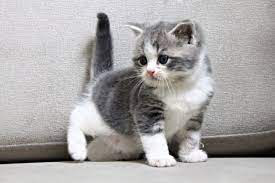

In [15]:
img = PILImage.create(upload.data[-1])
pred, _, prob = learn.predict(img)
print(f'Mushukmi?: {pred}')
print(f'Aniqlilik ehtimologi: {prob[1].item():.3f}')
img